# Traffic Sign Recognition with Convolutional Neural Networks

---

### **Problem Statement**

The objective of this project is to develop a Convolutional Neural Network (CNN) model that can accurately recognize and classify traffic signs from images. This is crucial for driver assistance systems and autonomous vehicles to interpret road signs and make informed decisions.

### **Objectives**

- Perform Exploratory Data Analysis (EDA) to understand the dataset.
- Preprocess the data to make it suitable for modeling.
- Build and train CNN models using Keras and TensorFlow.
- Evaluate model performance and analyze results.
- Discuss findings and potential improvements.

---


### **Dataset Description**

- **Dataset Name:** GTSRB - German Traffic Sign Recognition Benchmark
- **Description:**
  - Over 50,000 images of traffic signs.
  - 43 classes representing different traffic sign categories.
  - Images vary in size, lighting conditions, and angles.

### **Data Collection Method**

The GTSRB dataset was collected as part of a competition organized by the Institute for Neural Computation, Ruhr-University Bochum, Germany. Images were captured from real-world traffic environments, featuring a wide range of variations to simulate real driving conditions.

---

In [48]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input


In [49]:
# Dataset Path
data_dir = '/kaggle/input/gtsrb-german-traffic-sign/Train' 
num_classes = 43  

# Initialize lists 
images = []
labels = []

# Load images & labels
for class_id in range(num_classes):
    class_path = os.path.join(data_dir, str(class_id))
    image_files = os.listdir(class_path)
    for img_name in image_files:
        img_path = os.path.join(class_path, img_name)
        try:
            image = Image.open(img_path)
            image = image.resize((32, 32))
            images.append(np.array(image))
            labels.append(class_id)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


In [50]:
# Convert to Numpy Arrays
images = np.array(images)
labels = np.array(labels)

### Exploratory Data Analysis (EDA)

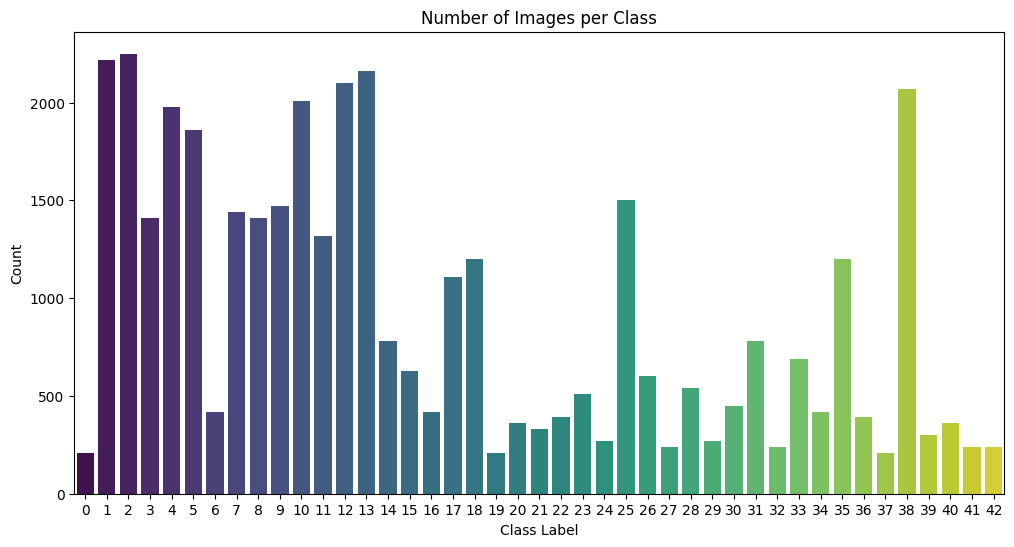

In [51]:
class_counts = pd.Series(labels).value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Number of Images per Class')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

Observations:

The dataset exhibits class imbalance, with some classes having significantly more images than others. This could affect model performance, and we may need to address it.


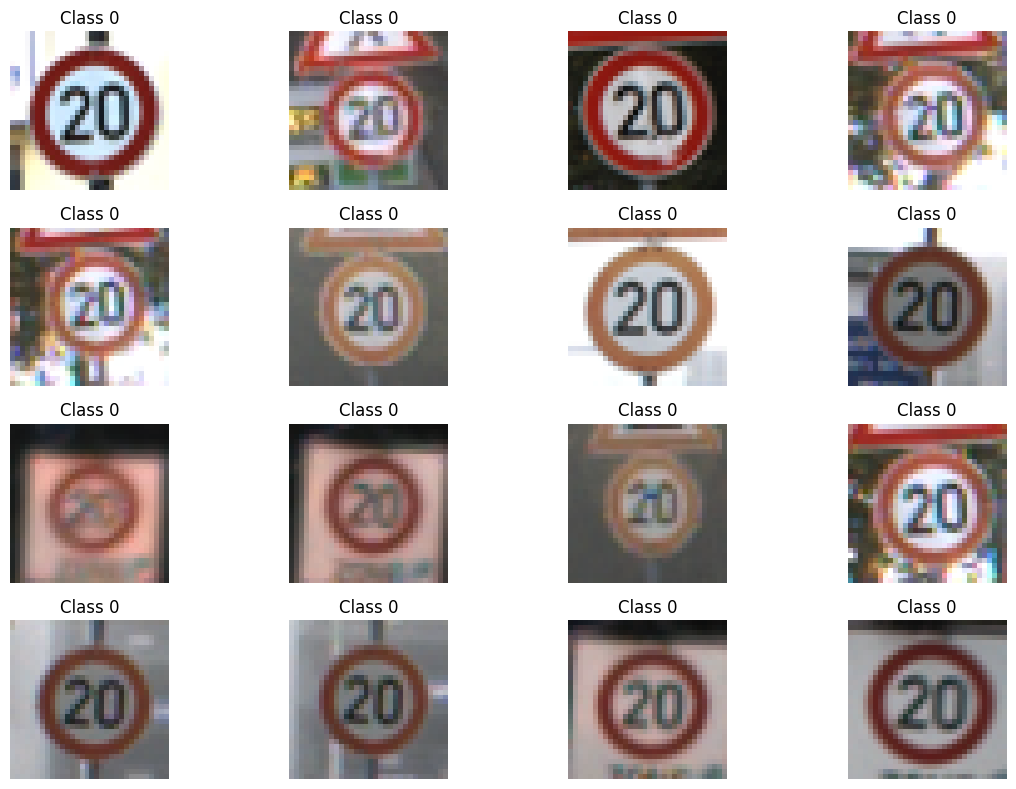

In [52]:
# Visualize sample images
plt.figure(figsize=(12, 8))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.imshow(images[i])
    plt.title(f"Class {labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Data Preprocessing

In [ ]:
images, labels = shuffle(images, labels, random_state=42)

# Normalize images
images = images / 255.0  

# encode labels
labels = to_categorical(labels, num_classes)

#Split data
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)

In [55]:
# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

### Model Building & Training

In [56]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of y_train: (31367, 43)
Shape of y_test: (7842, 43)


In [57]:

# Build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model.keras', save_best_only=True, monitor='val_accuracy')

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [58]:
# Train model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 70ms/step - accuracy: 0.3661 - loss: 2.5272 - val_accuracy: 0.9412 - val_loss: 0.2345
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.8596 - loss: 0.4619 - val_accuracy: 0.9777 - val_loss: 0.0998
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9308 - loss: 0.2258 - val_accuracy: 0.9824 - val_loss: 0.0591
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9520 - loss: 0.1616 - val_accuracy: 0.9952 - val_loss: 0.0164
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9629 - loss: 0.1208 - val_accuracy: 0.9976 - val_loss: 0.0088
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9715 - loss: 0.0920 - val_accuracy: 0.9948 - val_loss: 0.0162
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9729 - loss: 0.0877 - val_accuracy: 0.9972 - val_loss: 0.0075
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9763 - loss: 0.0818 - val_accurac

In [60]:
# Define callbacks 
model_checkpoint_mobilenet = ModelCheckpoint(
    'best_mobilenetv2.keras', save_best_only=True, monitor='val_accuracy'  
)

#### Pre-trained Model

In [61]:
# Pre-trained MobileNetV2 Model

# Load pre-trained MobileNetV2 model 
pretrained_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

mobilenet_model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Freeze base model to prevent overfitting
pretrained_model.trainable = False

# Define callbacks
early_stopping_mobilenet = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

model_checkpoint_mobilenet = ModelCheckpoint(
    'best_mobilenetv2.keras', save_best_only=True, monitor='val_accuracy'
)

# Compile MobileNetV2 model
mobilenet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train MobileNetV2 model
history_mobilenet = mobilenet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping_mobilenet, model_checkpoint_mobilenet]
)

/tmp/ipykernel_36/1414568488.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 41ms/step - accuracy: 0.1819 - loss: 3.0361 - val_accuracy: 0.3059 - val_loss: 2.3952
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.2741 - loss: 2.4594 - val_accuracy: 0.3247 - val_loss: 2.2726
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.3012 - loss: 2.3723 - val_accuracy: 0.3419 - val_loss: 2.2098
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.3120 - loss: 2.3149 - val_accuracy: 0.3549 - val_loss: 2.1592
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.3244 - loss: 2.2538 - val_accuracy: 0.3633 - val_loss: 2.1171
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.3264 - loss: 2.2320 - val_accuracy: 0.3734 - val_loss: 2.0890
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.3283 - loss: 2.2334 - val_accuracy: 0.3762 - val_loss: 2.0765
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.3441 - loss: 2.1820 - 

### Model Evaluation 

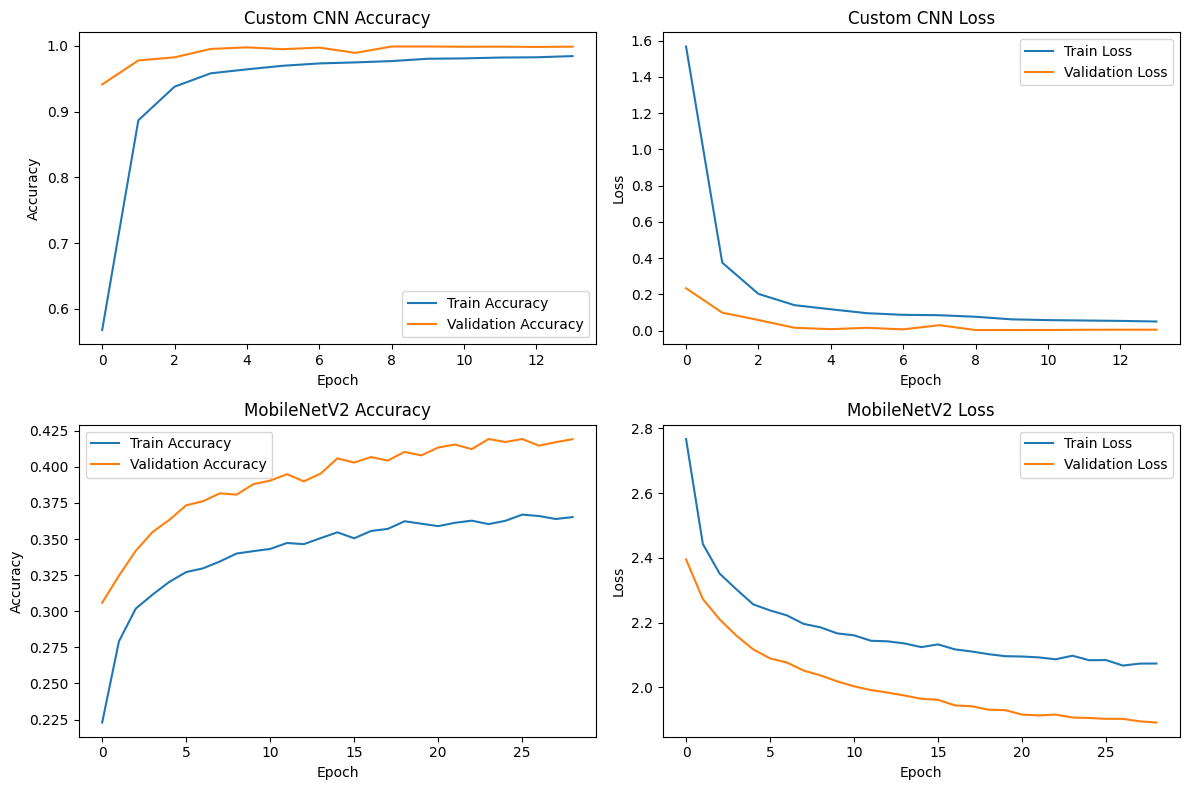

In [65]:
# Plot training & validation accuracy and loss for Custom CNN and MobileNetV2
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Custom CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step


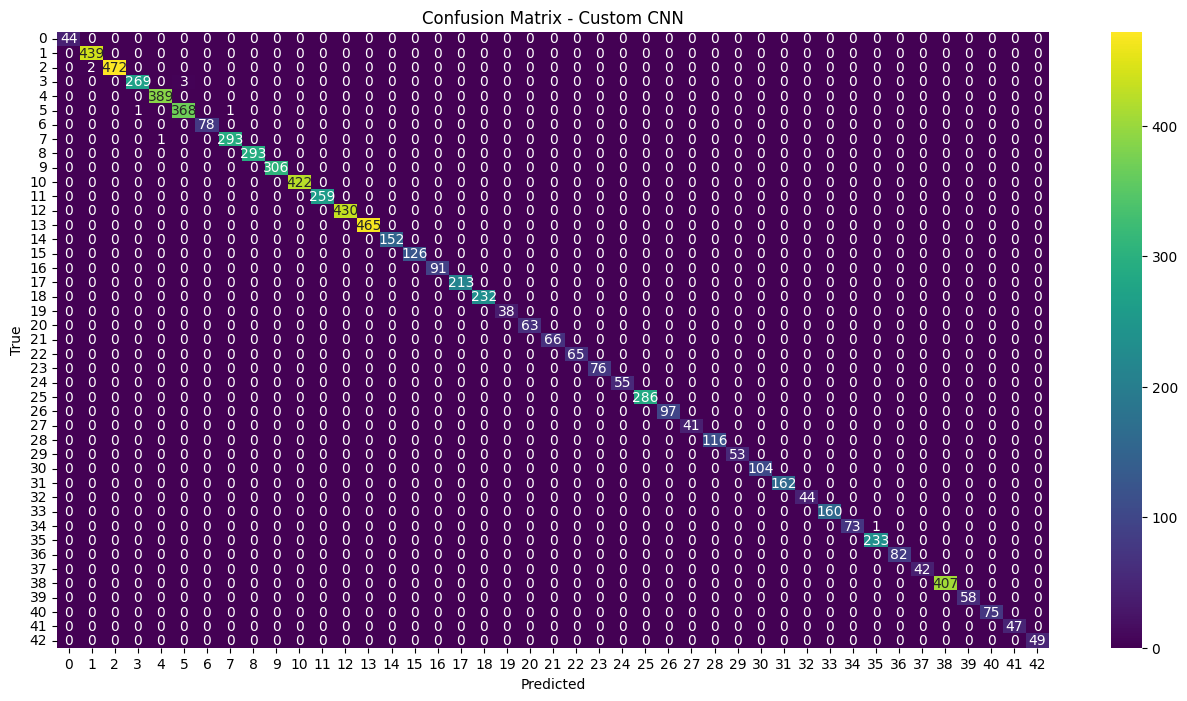

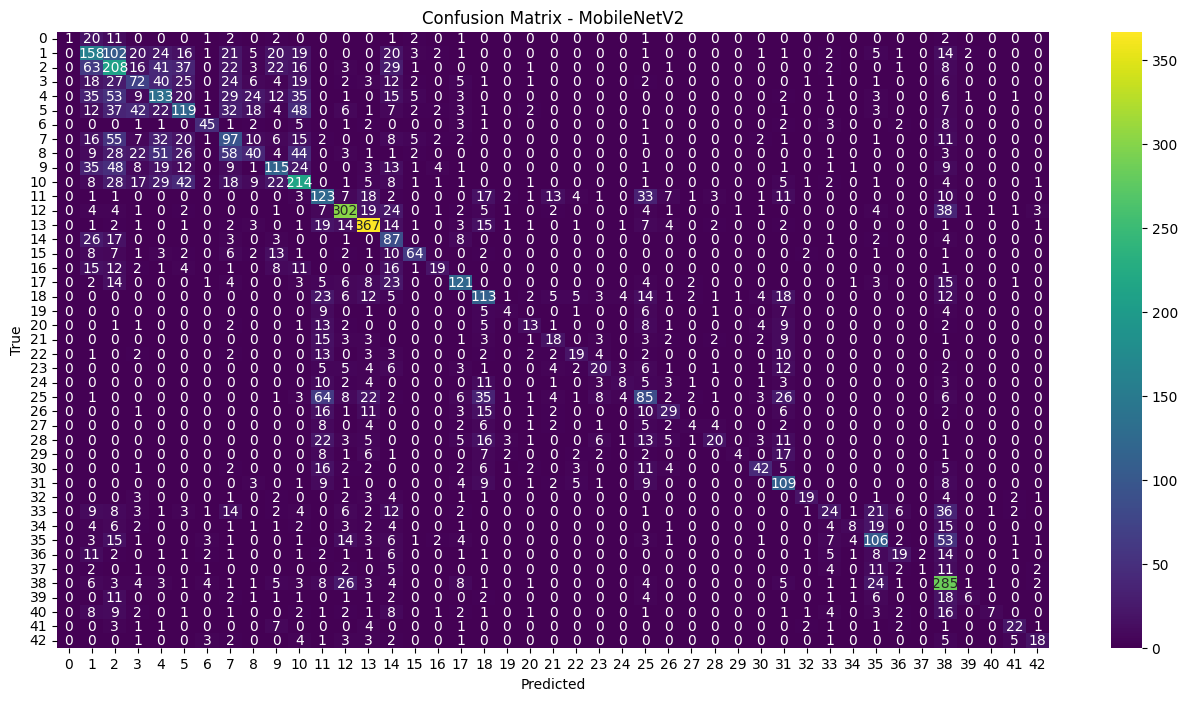

In [66]:
# Predict classes using Custom CNN
y_pred_custom = model.predict(X_test)
y_pred_custom_classes = np.argmax(y_pred_custom, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Predict classes using MobileNetV2
y_pred_mobilenet = mobilenet_model.predict(X_test)
y_pred_mobilenet_classes = np.argmax(y_pred_mobilenet, axis=1)

# Confusion Matrix for Custom CNN
cm_custom = confusion_matrix(y_true_classes, y_pred_custom_classes)
plt.figure(figsize=(16, 8))
sns.heatmap(cm_custom, annot=True, cmap='viridis', fmt='d')
plt.title('Confusion Matrix - Custom CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for MobileNetV2
cm_mobilenet = confusion_matrix(y_true_classes, y_pred_mobilenet_classes)
plt.figure(figsize=(16, 8))
sns.heatmap(cm_mobilenet, annot=True, cmap='viridis', fmt='d')
plt.title('Confusion Matrix - MobileNetV2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [69]:
# Classification Report for Custom CNN
print("Classification Report - Custom CNN")
print(classification_report(y_true_classes, y_pred_custom_classes))

# Classification Report for MobileNetV2
print("Classification Report - MobileNetV2")
print(classification_report(y_true_classes, y_pred_mobilenet_classes))

Classification Report - Custom CNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       439
           2       1.00      1.00      1.00       474
           3       1.00      0.99      0.99       272
           4       1.00      1.00      1.00       389
           5       0.99      0.99      0.99       370
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00       294
           8       1.00      1.00      1.00       293
           9       1.00      1.00      1.00       306
          10       1.00      1.00      1.00       422
          11       1.00      1.00      1.00       259
          12       1.00      1.00      1.00       430
          13       1.00      1.00      1.00       465
          14       1.00      1.00      1.00       152
          15       1.00      1.00      1.00       126
          16       1.00      1.00      1.00   

In [71]:
#Evaluate on test data 
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9990 - loss: 0.0036
Test Accuracy: 99.89%


In [74]:
#save model
model.save('traffic_sign_model.h5')

In [75]:
#Load Model
model = load_model('traffic_sign_model.h5')

In [28]:

# Test with New images
def predict_traffic_sign(image_path):
    image = Image.open(image_path)
    image = image.resize((30, 30))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    class_index = np.argmax(prediction)
    return class_index

test_image_files = os.listdir('/kaggle/input/gtsrb-german-traffic-sign/Test')
test_image_path = os.path.join('/kaggle/input/gtsrb-german-traffic-sign/Test', test_image_files[0]) 


# Test prediction
class_index = predict_traffic_sign(test_image_path)
print(f"Predicted Class: {class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: 18


### Discussion and Conclusion

Custom CNN performance:

- The Custom CNN model achieved an exceptional Test Accuracy of 99.89%. The model was able to classify traffic signs with high accuracy, making it suitable for real-world applications like autonomous driving.

- The confusion matrix for the Custom CNN revealed minimal misclassifications, indicating the model's high precision and reliability in recognizing different traffic signs.

- The classification report also confirmed that the Custom CNN achieved near-perfect precision, recall, and F1-scores across all classes, demonstrating the model's strong generalization to unseen data

MobileNetV2 Performance:

- MobileNetV2 achieved a Test Accuracy of 42%. This can be attributed to the model being designed for larger input image sizes (typically 224x224) and the use of a smaller input size (32x32) in this project.

- The classification report for MobileNetV2 showed that while it performs decently in some classes, its performance is inconsistent across different traffic sign categories

#### Potential Inprovements

- Using more advanced techniques such as brightness adjustment, contrast changes, or random cropping could better simulate real-world conditions and further improve model generalization.

- Both models could benefit from more extensive hyperparameter tuning. Using tools such as Grid Search or Bayesian Optimization to fine-tune learning rates, batch sizes, and the number of filters in convolutional layers could yield improved performance.

- Other pre-trained models such as ResNet50, InceptionV3, or EfficientNet could yield better performance. These models may offer a better trade-off between computational cost and accuracy, particularly for larger image sizes.




#### Conclusion

The Custom CNN demonstrated excellent performance on the GTSRB dataset, achieving near-perfect accuracy, while MobileNetV2 showcased potential for transfer learning with improvements needed for smaller input sizes.